# Projeto 02:

## 1) Getting Started

In [2]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline 
import seaborn as sns

In [3]:
#carregando o dataset
df_titanic = pd.read_csv('titanic-data-6.csv')

In [4]:
df_titanic.head() #imprimindo as primeiras linhas para verificar a organização dos dados

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Descrição das variáveis do dataset:

- Survived: Outcome of survival (0 = No; 1 = Yes)
- Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- Name: Name of passenger
- Sex: Sex of the passenger
- Age: Age of the passenger (Some entries contain NaN)
- SibSp: Number of siblings and spouses of the passenger aboard
- Parch: Number of parents and children of the passenger aboard
- Ticket: Ticket number of the passenger
- Fare: Fare paid by the passenger
- Cabin: Cabin number of the passenger (Some entries contain NaN)
- Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

## 2) Data Wrangling

#### Avaliando dados:
- número de amostras e colunas no conjunto de dados
- recursos com valores faltantes
- linhas duplicadas no conjunto de dados sobre vinho branco
- informações gerais

In [5]:
df_titanic.shape #verificando n de linhas e colunas

(891, 12)

In [6]:
# verificando se possui linhas sem registro e quais são os tipos de objeto das colunas
df_titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


'Age', 'Cabin' e 'Embarked' possuem registros vazios

In [7]:
#verificando a quantidade de dados nulos ou faltantes em 'Age', 'Cabin' e 'Embarked'
df_titanic.isnull().sum()  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Caso fosse necessário completar os registros sem valores com o valor médio do 'Age': 
# df_titanic['Age'].fillna(df_titanic['Age'].mean(), inplace=True)

In [9]:
sum(df_titanic.duplicated()) #verificando se há registros duplicados

0

In [10]:
df_titanic.describe() #verificando algumas análises sobre o dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# dando update nos valores nulos 'NaN' em 'Cabin' para facilitar o entendimento para o usuário final
df_titanic.update(df_titanic['Cabin'].fillna('Não cadastrado'))

In [12]:
df_titanic.isnull().sum() #verificando se o método funcionou

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [13]:
#utilizando uma função para nomear os portos e facilitar o entendimento da origem dos passageiros:
def full_port(port):
    if port == "C":
        return "Cherbourg"
    elif port == "Q":
        return "Queenstown"
    elif port == "S":
        return "Southhampton"
    else:
        return port 
df_titanic["Embarked"] = df_titanic["Embarked"].apply(full_port)

In [14]:
#utilizando uma função para facilitar o entendimento da classificação dos tickets
def full_class(pclass):
    if pclass ==1:
        return "Upper"
    elif pclass ==2:
        return "Middle"
    elif pclass ==3:
        return "Lower"
    else:
        return pclass
df_titanic["Pclass"] = df_titanic["Pclass"].apply(full_class)

## 3) Exploration:
ex: Quais são os fatores que podem ter influenciado na sobrevivência dos passageiros?

Analisando algumas características dos sobreviventes, separadamente:

In [15]:
# criando um novo dataframe para analisar separadamente os sobreviventes
df_alive = df_titanic[df_titanic['Survived']==1]
df_alive.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,Upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,Lower,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Não cadastrado,Southhampton
3,4,1,Upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southhampton
8,9,1,Lower,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Não cadastrado,Southhampton
9,10,1,Middle,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,Não cadastrado,Cherbourg


In [16]:
#algumas estatísticas sobre o dataset dos sobreviventes
df_alive.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,342.000000,342.0,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,80.000000,4.000000,5.000000,512.329200


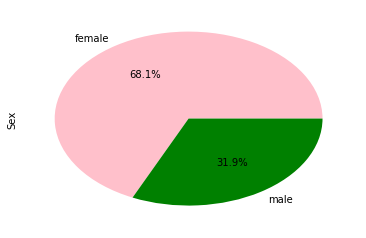

In [17]:
#analisando a % de sobreviventes, por gênero:
df_alive['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=('pink','green'),radius=1.,rotatelabels=False)                              

Text(0.5,0,'Age of passengers')

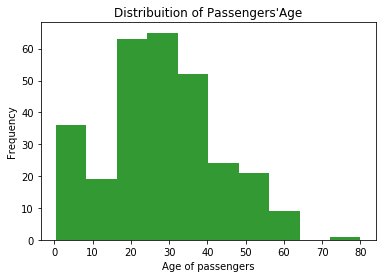

In [18]:
#analisando a distribuição de idade dos sobreviventes:
df_alive['Age'].plot(kind='hist', alpha=0.8, color='g')
plt.title("Distribuition of Passengers'Age")
plt.xlabel("Age of passengers")

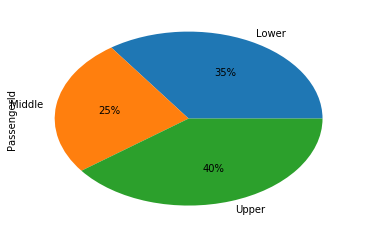

In [19]:
#analisando a % dos tickets dos sobreviventes:
df_pclass = df_alive.groupby('Pclass')['PassengerId'].count()
df_pclass.plot(kind='pie',autopct='%1.f%%',radius=1.,rotatelabels=False)

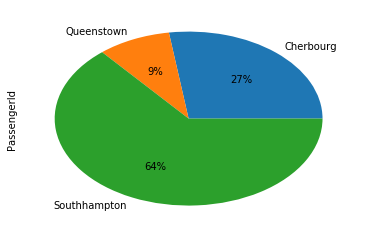

In [20]:
#analisando a origem de embarcação dos sobreviventes:
df_embarked = df_alive.groupby('Embarked')['PassengerId'].count()
df_embarked.plot(kind='pie',autopct='%1.f%%',radius=1.,rotatelabels=False)

Analisando de forma superficial as características dos sobreviventes:
- Maioria do sexo feminino (68,1%);
- Maioria estava no range de idade entre 20-35 anos;
- Maioria da classificação dos tickets eram do tipo upper(40%) e lower(35%), seguidas de 25% middle)
- Maioria embarcou de Southhampton (64%), Cherbourg (27%) e Queenstown (9%) 

### Question 01: Mais mulheres ou homens sobreviveram ao acidente? Dessa taxa, há algum vínculo com o tipo de ticket adquirido/classe social? 

Survived    0    1
Sex               
female     81  233
male      468  109


Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

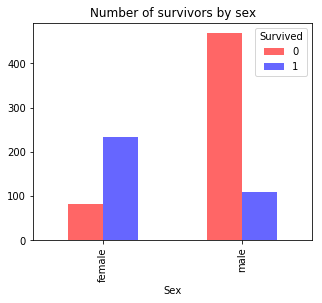

In [21]:
# Verificando se mais homens ou mulheres que embarcaram sobreviveram ao acidente
tabela = pd.pivot_table(data=df_titanic, values='PassengerId', index='Sex',columns='Survived',aggfunc = 'count')
print(tabela)
tabela.plot(kind='bar', color=['red','blue'], alpha=0.6, title='Number of survivors by sex',figsize=(5,4))

#outro formato de fazer:
df_titanic.groupby(['Survived','Sex']).size()

#### É possível verificar que mais mulheres sobreviveram ao acidente, em número absoluto (233) e proporção (233 sobreviventes de 314 que embarcaram, ou seja, 74% das mulheres que embarcaram sobreviveram ao acidente.)  

Vamos verificar se há alguma relação entre a sobrevivência com as condições sociais.

Text(0,0.5,'Fare')

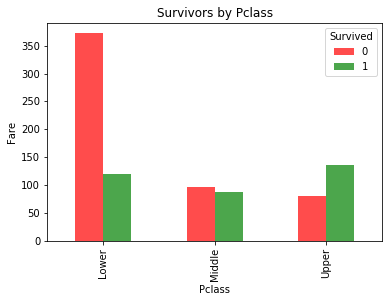

In [22]:
#investigando o número de sobreviventes por classe social:
Fare = pd.pivot_table(data=df_titanic, values='Fare', index='Pclass',columns='Survived',aggfunc = 'count')
Fare.plot(kind='bar', color=['red','green'],alpha=.7)
plt.title('Survivors by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')

É possível visualizar que a proporção (%) de sobreviventes aumenta conforme a classe do ticket (pclass)

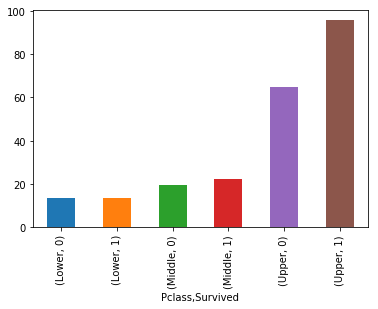

In [70]:
#analisando a média gasta com cada tipo de passagem:
df_titanic.groupby(['Pclass','Survived'])['Fare'].mean().plot(kind='bar')

Text(0.5,0,'Pclass')

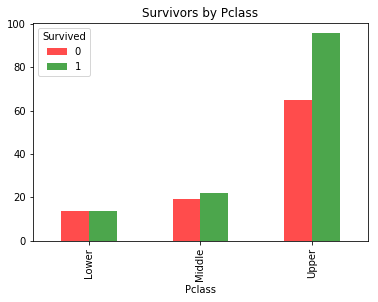

In [24]:
#investigando a média de valores dos tipos das passagens:
ticket_class = pd.pivot_table(data=df_titanic, values='Fare', index='Pclass',columns='Survived',aggfunc = 'mean')
ticket_class.plot(kind='bar', color=['red','green'],alpha=.7)
plt.title('Survivors by Pclass')
plt.xlabel('Pclass')

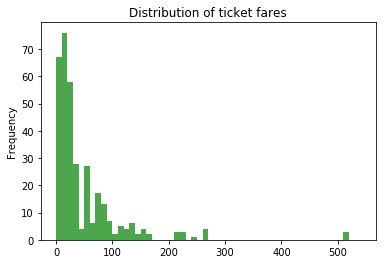

In [25]:
df_alive['Fare'].plot(kind='hist',color='green',bins=range(0,550,10), title="Distribution of ticket fares",alpha=.7)

In [26]:
# Verificando a % de sobrevivência considerando o sexo e classe social:
def survival_rate(pclass, sex):
#    Args:
#        pclass: Lower, Middle ou Upper
#        sex: male or female
#    Returns:
#        survival rate as percentage

    grouped_by_total = df_titanic.groupby(['Pclass', 'Sex']).size()[pclass,sex]
    grouped_by_survived = df_titanic.groupby(['Pclass','Survived','Sex']).size()[pclass,1,sex]
    print(grouped_by_survived)
    print(grouped_by_total)
    survived_pct = (grouped_by_survived / grouped_by_total * 100).round(2)
    
    return survived_pct 


In [27]:
#Algumas análises sobre as pessoas que sobreviveram:
print("Classe Lower e Sexo F: {}% \n".format(survival_rate('Lower','female')))
print("Classe Middle e Sexo F: {}% \n".format(survival_rate('Middle','female')))
print("Classe Upper e Sexo F: {}% \n".format(survival_rate('Upper','female')))

print("\nClasse Lower e Sexo M: {}% \n".format(survival_rate('Lower','male')))
print("Classe Middle e Sexo M: {}% \n".format(survival_rate('Middle','male')))
print("Classe Upper e Sexo M: {}% \n".format(survival_rate('Upper','male')))                                                                              

72
144
Classe Lower e Sexo F: 50.0% 

70
76
Classe Middle e Sexo F: 92.11% 

91
94
Classe Upper e Sexo F: 96.81% 

47
347

Classe Lower e Sexo M: 13.54% 

17
108
Classe Middle e Sexo M: 15.74% 

45
122
Classe Upper e Sexo M: 36.89% 



#### Analisando por essas variáveis, é possível notar que quanto maior a classe do ticket (pclass), maior a % de sobrevivência, de ambos os gêneros.

### Question 02: Há alguma relação entre a idade com a sobrevivência dos passageiros?

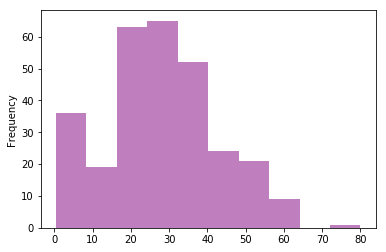

In [28]:
# analisando um gráfico com o número de sobreviventes
df_alive['Age'].plot(kind='hist',color='purple',alpha=0.5)

O gráfico de histograma mostra que a maior quantidade dos sobreviventes, em número absoluto, possuíam em torno de 20-30 anos, porém não é possível visualizar qual o percentual de sobreviventes por idade. Dessa forma, é conveniente criar uma função para analisar cada range de idade:

In [29]:
def survival_age(age1, age2):
# Args:
# age1,age2: range de idades
# Returns: número de pessoas que embarcaram, sobreviveram e a % de sobrevivência do range fornecido
    
    df_age = df_alive[(df_alive["Age"]>age1) & (df_alive["Age"]<=age2)]
    df_age_titanic = df_titanic[(df_titanic["Age"]>age1) & (df_titanic["Age"]<=age2)]
    
    print ("Sobreviveram {} pessoas entre {} e {} anos.".format(df_age['Age'].count(),age1,age2))
    print ("Embarcaram {} pessoas entre {} e {} anos.".format(df_age_titanic['Age'].count(),age1,age2))
    
    age_pct = df_age['Age'].count() / df_age_titanic['Age'].count()     
    return "Survival rate(%): {}".format(round(age_pct*100,2))

Para analisar cada range, vamos segmentar nossa classificação em 4 grupos:
- Até 18 anos (crianças e adolescentes)
- 19-40 (jovens adultos)
- 41-60 (adultos)
- 61+ (idosos)

In [30]:
# Verificando a taxa de sobrevivência de crianças e adolescentes:
survival_age(0,18)

Sobreviveram 70 pessoas entre 0 e 18 anos.
Embarcaram 139 pessoas entre 0 e 18 anos.


'Survival rate(%): 50.36'

In [31]:
# Verificando a taxa de sobrevivência de jovens adultos:
survival_age(18,40)

Sobreviveram 165 pessoas entre 18 e 40 anos.
Embarcaram 425 pessoas entre 18 e 40 anos.


'Survival rate(%): 38.82'

In [32]:
# Verificando a taxa de sobrevivência de adultos:
survival_age(40,60)

Sobreviveram 50 pessoas entre 40 e 60 anos.
Embarcaram 128 pessoas entre 40 e 60 anos.


'Survival rate(%): 39.06'

In [49]:
# Verificando a taxa de sobrevivência de idosos:
survival_age(60,100)

Sobreviveram 5 pessoas entre 60 e 100 anos.
Embarcaram 22 pessoas entre 60 e 100 anos.


'Survival rate(%): 22.73'

Apesar do número absoluto de sobreviventes ser maior na faixa dos 30 anos, a maior proporção de sobreviventes foi de crianças e adolescentes (50%), seguida de adultos (40-60 anos) e jovens adultos(18-40). 
Dessa forma, uma possibilidade seria que deram prioridade às crianças e adolescentes no salvamento.

Verificando algumas relações entre o Sexo, Tipo do Ticket com a Idade dos sobreviventes:

In [34]:
df_titanic.groupby(['Sex','Pclass','Survived'])['Age'].describe()

count       mean        std    min    25%   50%  \
Sex    Pclass Survived                                                    
female Lower  0          55.0  23.818182  12.833465   2.00  15.25  22.0   
              1          47.0  19.329787  12.303246   0.75  13.50  19.0   
       Middle 0           6.0  36.000000  12.915107  24.00  26.25  32.5   
              1          68.0  28.080882  12.764693   2.00  21.75  28.0   
       Upper  0           3.0  25.666667  24.006943   2.00  13.50  25.0   
              1          82.0  34.939024  13.223014  14.00  23.25  35.0   
male   Lower  0         215.0  27.255814  12.135707   1.00  20.00  25.0   
              1          38.0  22.274211  11.555786   0.42  16.50  25.0   
       Middle 0          84.0  33.369048  12.158125  16.00  24.75  30.5   
              1          15.0  16.022000  19.547122   0.67   1.00   3.0   
       Upper  0          61.0  44.581967  14.457749  18.00  33.00  45.5   
              1          40.0  36.248000  14.936744   0.92  27.00  36.0   

                          75%   max  
Sex    Pclass Survived               
female Lower  0         31.00  48.0  
              1         26.50  63.0  
       Middle 0         42.50  57.0  
              1         35.25  55.0  
       Upper  0         37.50  50.0  
              1         44.00  63.0  
male   Lower  0         34.00  74.0  
              1         29.75  45.0  
       Middle 0         39.00  70.0  
              1         31.50  62.0  
       Upper  0         56.00  71.0  
              1         48.00  80.0

### Question 03: A maioria das pessoas que sobreviveu viajou sozinha ou acompanhada (família ou cônjugue)?

Analisando o agrupamento das pessoas por SibSp, Parch e ambos:

In [35]:
df_alive.groupby(['Survived','SibSp'])['PassengerId'].count()

Survived  SibSp
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: PassengerId, dtype: int64

In [36]:
df_alive.groupby(['Survived','Parch'])['PassengerId'].count()

Survived  Parch
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: PassengerId, dtype: int64

In [37]:
df_alive.groupby(['SibSp','Parch'])['PassengerId'].count()

SibSp  Parch
0      0        163
       1         25
       2         21
       3          1
1      0         64
       1         34
       2         12
       3          1
       5          1
2      0          4
       1          6
       2          2
       3          1
3      0          2
       2          2
4      2          3
Name: PassengerId, dtype: int64

In [38]:
# Para analisar se o passageiro viajou acompanhado ou não, SibSp ou Parch devem ser =! de 0.
# Dessa forma, iremos declarar uma variável para nos auxiliar nesse cálculo:
family = np.where((df_titanic['SibSp'] + df_titanic['Parch'])>=1, "Viajou COM família", "Viajou SEM Família")

Text(0,0.5,'number of travelers')

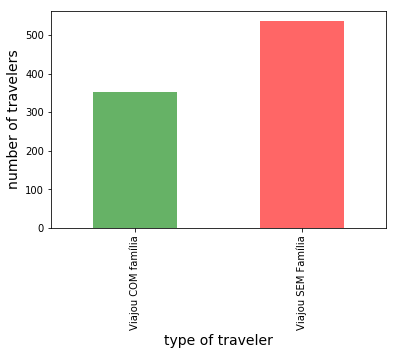

In [39]:
#analisando as informações das pessoas que embarcaram acompanhadas:
colors = ['green', 'red']
x = df_titanic.groupby(family)['Survived'].count().plot(kind='bar',color=colors,alpha = .6)
plt.xlabel('type of traveler', fontsize=14)
plt.ylabel('number of travelers', fontsize=14)

Text(0,0.5,'number of travelers')

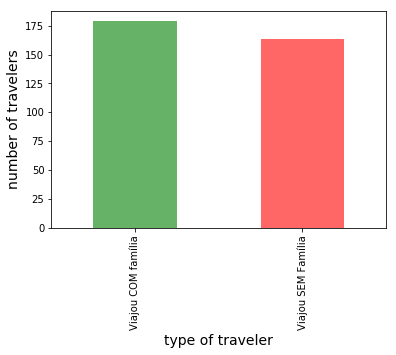

In [68]:
#analisando as informações das pessoas que embarcaram acompanhadas e sobreviveram:
family_alive = np.where((df_alive['SibSp'] + df_alive['Parch'])>=1,"Viajou COM família", "Viajou SEM Família")

#plotando o gráfico
colors = ['green', 'red']
x = df_alive.groupby(family_alive)['Survived'].count().plot(kind='bar',color=colors,alpha = .6)
plt.xlabel('type of traveler', fontsize=14)
plt.ylabel('number of travelers', fontsize=14)

Embora o número absoluto de pessoas que embarcou sozinha seja maior,  a proporção (%) das pessoas que viajou acompanhada, com família ou cônjugues, foi maior em relação à quem viajou sozinho.

### Question 04: De quais portos houveram a maior taxa de sobrevivência? 

Survived        0    1
Embarked              
Cherbourg      75   93
Queenstown     47   30
Southhampton  427  217


Text(0,0.5,'Number of travelers')

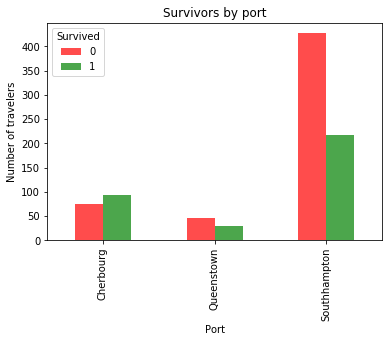

In [42]:
port = pd.pivot_table(data=df_titanic, values='PassengerId', index='Embarked',columns='Survived',aggfunc = 'count')
print(port)
port.plot(kind='bar', color=['red','green'],alpha=.7)
plt.title('Survivors by port')
plt.xlabel('Port')
plt.ylabel('Number of travelers')

Pode-se notar que proporcionalmente as pessoas que embarcaram em Southhampton foram as que mais faleceram no acidente. Vamos verificar agora a proporção dos sobreviventes para cada porto: 

In [43]:
def survival_port(port):
#    Args:
#        port: 'Southhampton', 'Cherbourg', 'Queenstown'
#    Returns:
#        survival rate as percentage

    grouped_by_port = df_titanic.groupby(['Embarked']).size()[port]
    grouped_by_survived = df_titanic.groupby(['Embarked','Survived']).size()[port,1]
    survived_pct = (grouped_by_survived / grouped_by_port * 100).round(2)
    print("Número de pessoas que sobreviveram:{}".format(grouped_by_survived))
    print("Número de pessoas que embarcaram:{}".format(grouped_by_port))
    
    return survived_pct 

In [44]:
print("A taxa de sobreviventes que embarcaram de {} foi de {}%:".format('Southhampton',survival_port('Southhampton')))

Número de pessoas que sobreviveram:217
Número de pessoas que embarcaram:644
A taxa de sobreviventes que embarcaram de Southhampton foi de 33.7%:


In [45]:
print("A taxa de sobreviventes que embarcaram de {} foi de {}%:".format('Cherbourg',survival_port('Cherbourg')))

Número de pessoas que sobreviveram:93
Número de pessoas que embarcaram:168
A taxa de sobreviventes que embarcaram de Cherbourg foi de 55.36%:


In [46]:
print("A taxa de sobreviventes que embarcaram de {} foi de {}%:".format('Queenstown',survival_port('Queenstown')))

Número de pessoas que sobreviveram:30
Número de pessoas que embarcaram:77
A taxa de sobreviventes que embarcaram de Queenstown foi de 38.96%:


A maior taxa de sobreviventes foi de Cherbourg, com 55.36%:

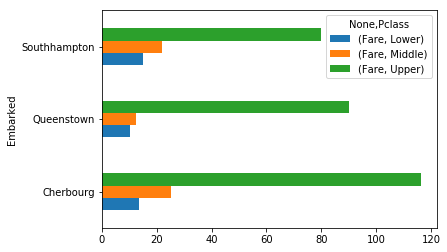

In [47]:
#analisando o valor dos tickets por porto:
port = pd.pivot_table(df_alive, values=['Fare'], index='Embarked',columns='Pclass',aggfunc = np.mean)
port.plot(kind='barh')

In [48]:
port = pd.pivot_table(df_alive, values=['Age','Fare'], index=['Embarked','Pclass'],aggfunc = np.mean)
port

Age        Fare
Embarked     Pclass                       
Cherbourg    Lower   13.940000   13.404668
             Middle  16.875000   25.305100
             Upper   35.905660  116.121754
Queenstown   Lower   19.500000   10.398770
             Middle  30.000000   12.350000
             Upper   33.000000   90.000000
Southhampton Lower   22.737705   15.131464
             Middle  26.822027   21.926316
             Upper   34.529091   79.750114

É possível visualizar que a média dos preços das passagens de Cherbourg são as mais caras, seguidas de Queenstown e Southhampton. Também é possível notar que a proporção de sobreviventes foi respectivamente nessa ordem (Cherbourg , Queenstown  e Southhampton)

## 4) Insights / Overall Conclusions:

A partir das análises realizadas, é possível retirar alguns insights de vários ângulos como:

GÊNERO (M ou F): 
- Grande maioria dos sobreviventes era composta por mulheres, tanto em números absolutos quanto em proporção. Há a possibilidade das mulheres possuírem prioridade na operação de salvamento. 

IDADE
- Apesar do número absoluto de sobreviventes ser maior na faixa dos 20-30 anos, a maior proporção* de sobreviventes foi de crianças e adolescentes (50%), seguida de adultos (40-60 anos) e jovens adultos(18-40) Há a possiblidade das crianças e adolescentes possuírem prioridade na operação de salvamento. 
- *taxa de embarcados x sobreviventes 

CLASSE DOS TICKETS (Pclass):
- Pessoas que possuíam tickets de classe maior (Pclass=Upper), de ambos os gêneros, tiveram o maior % de sobrevivência

PORTO DE EMBARCAÇÃO (Embarked):
- Apesar do número absoluto de sobreviventes for do porto de Southhampton , a proporção das pessoas que embarcaram do porto de Cherbourg , teve maior índice de sobrevivência.
- obs: a média das passagens classes Middle e Upper de Cherbourg foram mais elevadas que as outras  

VIAGEM COM/SEM FAMÍLIA:
- Maioria das pessoas que viajou acompanhada teve maior % de sobrevivência, o que pode indicar uma priorização do salvamento das famílias



### Limitações:
Apesar desses insights, possuímos algumas limitações de informações, como informações nulas ou incompletas, o que pode gerar uma distorção de entendimento da realidade.

Além disso, analisando apenas os dados sem considerar todo o contexto, pode levar à uma análise equivocada ou incompleta do acontecimento. 


References:
- https://github.com
- https://github.com/alemosie/titanic-analysis/blob/master/titanic-analysis.ipynb
- https://github.com/sagarnildass/Titanic-Data-Analysis/blob/master/Titanic_Data_Analysis.ipynb
- https://pandas.pydata.org
- http://www.numpy.org/
- https://paulovasconcellos.com.br/
- http://felipegalvao.com.br
- http://minerandodados.com.br
- https://stackoverflow.com
- https://medium.com